In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 2: Load Dataset
df = pd.read_csv("headbrain.csv")
df.columns = df.columns.str.strip()  # Clean column names
print("Dataset Head:")
print(df.head())

Dataset Head:
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [3]:
# Step 3: EDA
print("\nDataset Info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

print("\nDescriptive Stats:\n", df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB
None

Missing values:
 Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

Descriptive Stats:
            Gender   Age Range  Head Size(cm^3)  Brain Weight(grams)
count  237.000000  237.000000       237.000000           237.000000
mean     1.434599    1.535865      3633.991561          1282.873418
std      0.496753    0.499768       365.261422           120.340446
min      1.000000    1.000000      2720.000000           955.000000
25%      1.000000    1.000000      3389.000000          12

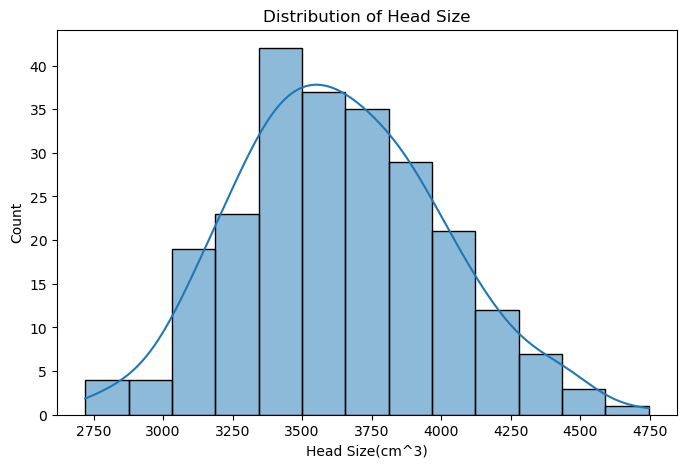

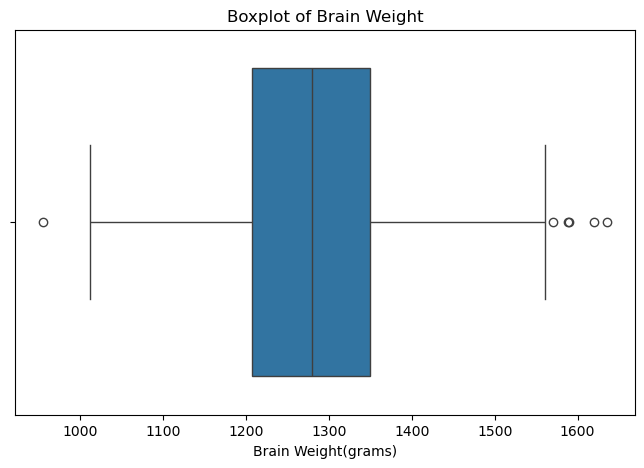

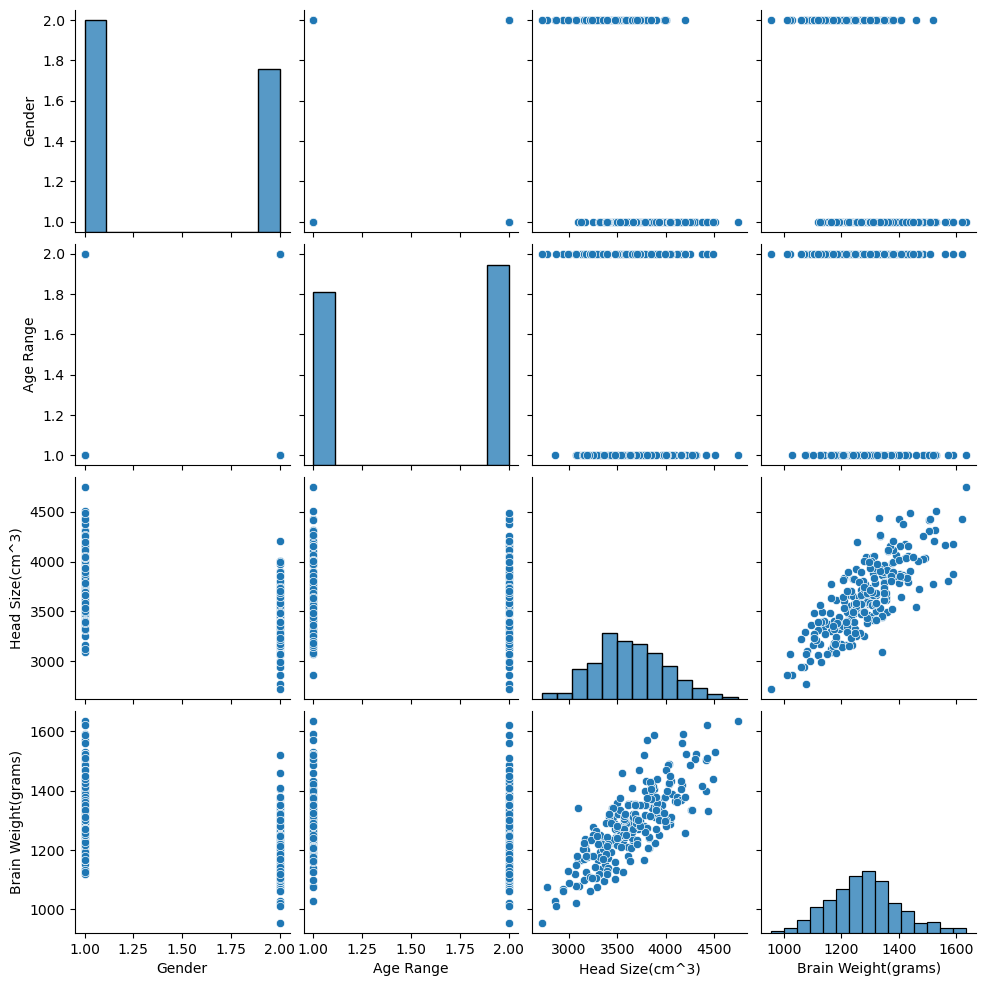

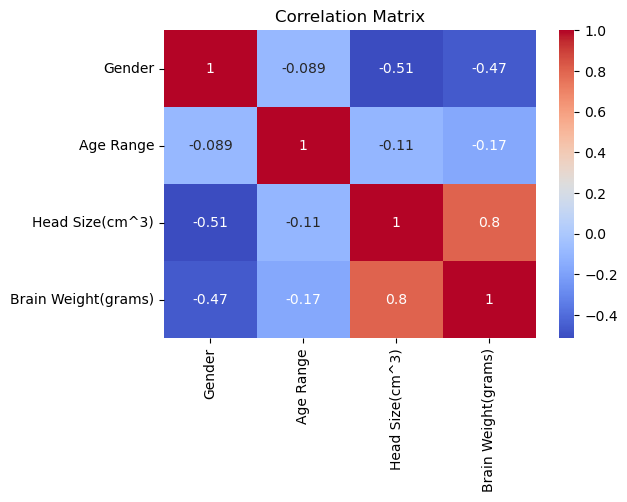

In [4]:
# Step 4: Visualization
plt.figure(figsize=(8, 5))
sns.histplot(df['Head Size(cm^3)'], kde=True)
plt.title("Distribution of Head Size")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Brain Weight(grams)'])
plt.title("Boxplot of Brain Weight")
plt.show()

sns.pairplot(df)
plt.show()

# Correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [5]:
# Step 5: Data Preprocessing
X = df.drop('Brain Weight(grams)', axis=1)
y = df['Brain Weight(grams)']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Step 7: Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔍 Random Forest Regressor Results:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


🔍 Random Forest Regressor Results:
R2 Score: 0.6081732064495998
MSE: 6421.396094629628


In [9]:
# Step 8: Bagging Regressor (Fixed for latest sklearn)
bagging = BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

print("\n🔍 Bagging Regressor Results:")
print("R2 Score:", r2_score(y_test, y_pred_bag))
print("MSE:", mean_squared_error(y_test, y_pred_bag))



🔍 Bagging Regressor Results:
R2 Score: 0.6285884856270115
MSE: 6086.823277919629


In [10]:
# Step 9: Boosting Regressor (AdaBoost)
boosting = AdaBoostRegressor(n_estimators=50, random_state=42)
boosting.fit(X_train, y_train)
y_pred_boost = boosting.predict(X_test)

print("\n🔍 Boosting (AdaBoost) Regressor Results:")
print("R2 Score:", r2_score(y_test, y_pred_boost))
print("MSE:", mean_squared_error(y_test, y_pred_boost))


🔍 Boosting (AdaBoost) Regressor Results:
R2 Score: 0.6202035755676243
MSE: 6224.238149989229


In [11]:
# Step 10: Explain Bagging vs Boosting
print("\n📘 Notes:")
print("Bagging builds models independently and averages them (e.g., Random Forest).")
print("Boosting builds models sequentially, each correcting the previous one (e.g., AdaBoost).")


📘 Notes:
Bagging builds models independently and averages them (e.g., Random Forest).
Boosting builds models sequentially, each correcting the previous one (e.g., AdaBoost).


Interview question

 1. Explain Bagging and Boosting methods. How are they different from each other?

Bagging (Bootstrap Aggregating):
Bagging is an ensemble learning technique that builds multiple models independently using random subsets of the data (with replacement).

Each model learns separately, and their predictions are aggregated (averaged for regression or majority vote for classification).

Reduces variance and helps prevent overfitting.

Common example: Random Forest is a classic bagging method that builds many decision trees.

Boosting:
Boosting is a sequential ensemble technique where each new model focuses on the errors of the previous ones.

Models are trained one after another, and each one tries to correct the mistakes made by the earlier models.

Final prediction is a weighted combination of all models.

Common examples: AdaBoost, Gradient Boosting, XGBoost.

2. How do you handle imbalance in the data?
Handling Imbalanced Data (Classification Context):
Imbalanced data occurs when one class is significantly underrepresented compared to others. This leads to biased models that predict the majority class too often.

Common Strategies:
1. Resampling Techniques
Oversampling the minority class: Duplicate or synthetically create new samples (e.g., SMOTE).

Undersampling the majority class: Remove samples to balance the dataset.

2. Use of Class Weights
Many models (like RandomForest, LogisticRegression) support a class_weight='balanced' parameter to penalize misclassifications of the minority class more.

3. Evaluation Metrics
Use metrics that are more informative than accuracy:

Precision, Recall, F1-score

ROC AUC score

Confusion matrix

4. Anomaly Detection Techniques
When imbalance is extreme (e.g., fraud detection), it can be treated as an anomaly detection problem instead of classification.